## CARGA DE DATOS Y VISTAZO GENERAL

In [2]:
# Cargar las librerías necesarias
import pandas as pd
import os

# Cargar los datos en un DataFrame
calidad_aire = pd.read_csv('https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad_aire_historico/1284212629698.csv', sep = ';')

# Mostrar las primeras filas del DataFrame
print(calidad_aire.head(2))
print("="*100)

# Mostrar la estructura del DataFrame
print(calidad_aire.info())
print("="*100)
# Mostrar un resumen estadístico de las variables numéricas
print(calidad_aire.describe())
print("="*100)

        Fecha  CO (mg/m3)  NO (ug/m3)  NO2 (ug/m3)  O3 (ug/m3)  PM10 (ug/m3)  \
0  2020-12-31         0.6         8.0         16.0         NaN           6.0   
1  2020-12-31         NaN         2.0          6.0         NaN           8.0   

   PM25 (ug/m3)  SO2 (ug/m3) Provincia           Estación    Latitud  \
0           NaN          1.0    Burgos            Burgos1  42.351111   
1           NaN          4.0      León  C.T.L.R. - Naredo  42.816667   

   Longitud                      Posición  
0 -3.675556  42.3511111111,-3.67555555556  
1 -5.533333  42.8166666667,-5.53333333333  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Fecha         446014 non-null  object 
 1   CO (mg/m3)    101158 non-null  float64
 2   NO (ug/m3)    415030 non-null  float64
 3   NO2 (ug/m3)   413497 non-null  float64
 4   O3 (ug/m3)    275414 non-null 

## DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

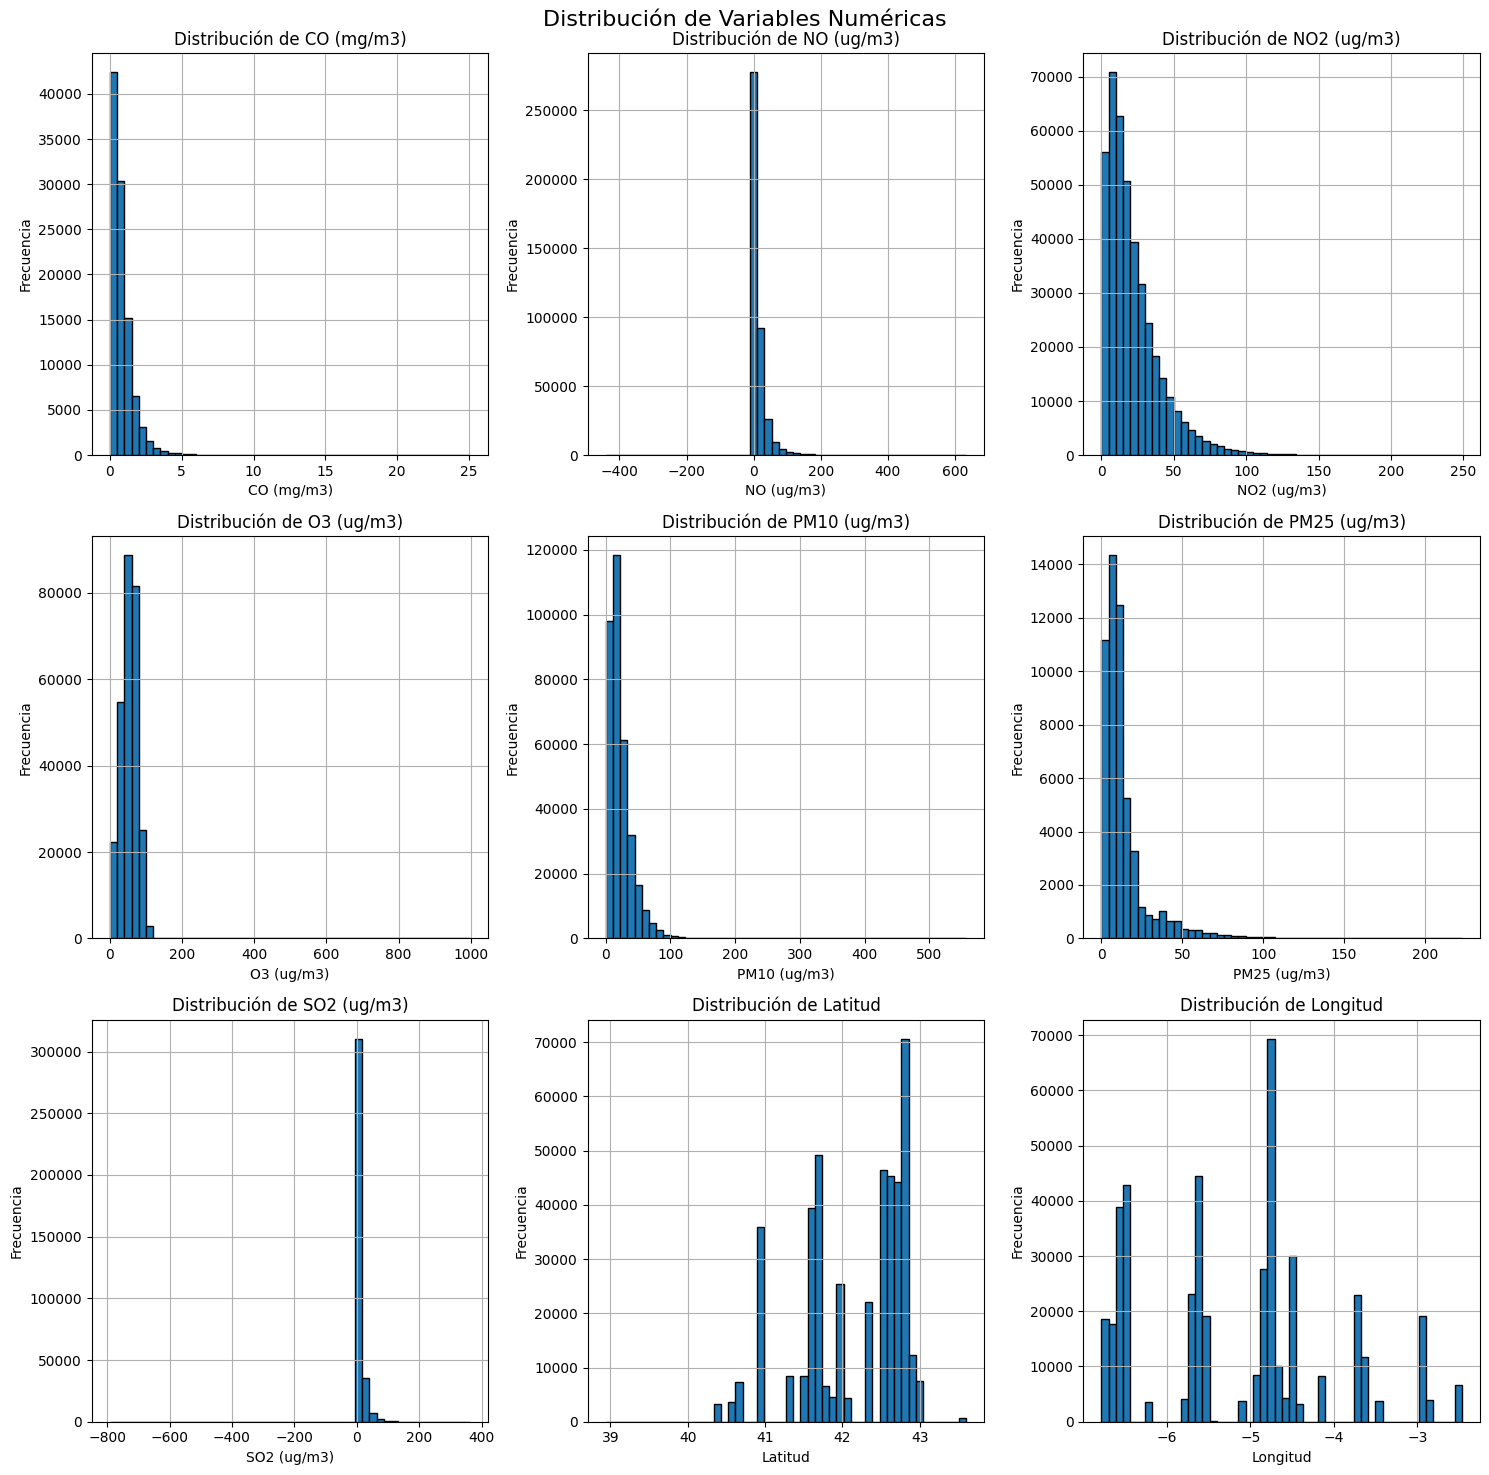

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo las columnas numéricas
columnas_numericas = calidad_aire.select_dtypes(include=[np.number]).columns

# Calcular el número de filas y columnas para el subplot
n = len(columnas_numericas)
nrows = 3
ncols = min(n, 3)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    calidad_aire[col].hist(ax=ax, bins=50, edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## AJUSTE DE LAS VARIABLES CATEGÓRICAS

In [4]:
# Ajustar el tipo de la variable Fecha
calidad_aire['Fecha'] = pd.to_datetime(calidad_aire['Fecha'])

# Ajustar el tipo de la variable Provincia
print(calidad_aire['Provincia'].unique())
calidad_aire['Provincia'] = calidad_aire['Provincia'].astype('category')

# Ajustar el tipo de la variable Estación
print(calidad_aire['Estación'].unique())
calidad_aire['Estación'] = calidad_aire['Estación'].astype('category')

['Burgos' 'León' 'Palencia' 'Salamanca' 'Valladolid' 'Soria' 'Zamora'
 'Avila' 'Segovia' 'Madrid']
['Burgos1' 'C.T.L.R. - Naredo' 'Carracedelo' 'La Robla'
 'Tudela Veguin-Tudela Veguin' 'Valderas' 'Guardo' 'Hontoria 1 - Poblado'
 'Renault4' 'El Maillo' 'Salamanca5' 'Arco de ladrillo II' 'La rubia II'
 'Medina del Campo' 'Michelin2' 'Puente Poniente-Mº Luisa Sánchez'
 'Vega Sicilia' 'Aranda de Duero 2' 'Miranda de Ebro2'
 'C.T.L.R. - Cuadros' 'C.T.L.R. - Ventosilla' 'Lario' 'Leon1' 'Otero'
 'Toral de los Vados' 'C.T.G. - Villalba' 'Palencia 3'
 'Muriel de la Fuente' 'Soria' 'Renault3' 'Zamora 2' 'Avila II' 'Burgos4'
 'Medina de Pomar' 'Leon 4' 'Ponferrada4' 'C.T.G. - Compuerto'
 'Hontoria 2 - Venta de Baños' 'Salamanca6' 'Segovia 2' 'Michelin1'
 'Renault1' 'Renault2' 'VALLADOLID SUR' 'C.T.Compostilla-Congosto'
 'C.T.Compostilla-Cortiguera' 'C.T.Compostilla-Villaverde'
 'C.T.Compostilla-Compostilla' 'C.T.Compostilla-Santa Marina' 'NH3'
 'Miranda de Ebro1' 'Puente Regueral' 'San Martín de

## ANÁLISIS DE DATOS AUSENTES

In [5]:
# Devuelve un DataFrame booleano
calidad_aire.isna()

# Devuelve True si hay al menos un valor ausente
calidad_aire.isna().any().any()

# Devuelve el número total de NaN que presenta el DataFrame
print(calidad_aire.isna().sum().sum())
# Devuelve el % de valores perdidos
print(calidad_aire.isna().mean().mean())

# Detección del número de valores perdidos en cada una de las columnas
calidad_aire.isna().sum()

# Detección del % de valores perdidos en cada una de las columnas
calidad_aire.isna().mean().round(2)

1163037
0.20058649418041727


Fecha           0.00
CO (mg/m3)      0.77
NO (ug/m3)      0.07
NO2 (ug/m3)     0.07
O3 (ug/m3)      0.38
PM10 (ug/m3)    0.23
PM25 (ug/m3)    0.88
SO2 (ug/m3)     0.20
Provincia       0.00
Estación        0.00
Latitud         0.00
Longitud        0.00
Posición        0.00
dtype: float64

## TRATAMIENTO DE DATOS AUSENTES (ELIMINACIÓN E IMPUTACIÓN POR LA MEDIA)

In [6]:
# Eliminación de las variables que presentan un % de NaN superior al 50%
calidad_aire = calidad_aire.loc[:, calidad_aire.isna().mean() < 0.5]
print(f" Tras esta operación, contamos con {len(calidad_aire.columns)} columnas")

# Seleccionamos las variables numéricas
columnas_numericas = calidad_aire.select_dtypes(include=[np.number]).columns

# Calculamos la media para cada una de las variables numéricas sin tener en cuenta los NaN
cols_mean = calidad_aire[columnas_numericas].mean()

# Sustituimos los valores NaN por la media correspondiente a cada variable
calidad_aire[columnas_numericas] = calidad_aire[columnas_numericas].fillna(cols_mean)

 Tras esta operación, contamos con 11 columnas


## DETECCIÓN DE ATÍPICOS SOBRE VARIABLES NUMÉRICAS (HISTOGRAMA Y GRAFICO DE CAJAS Y BIGOTES)

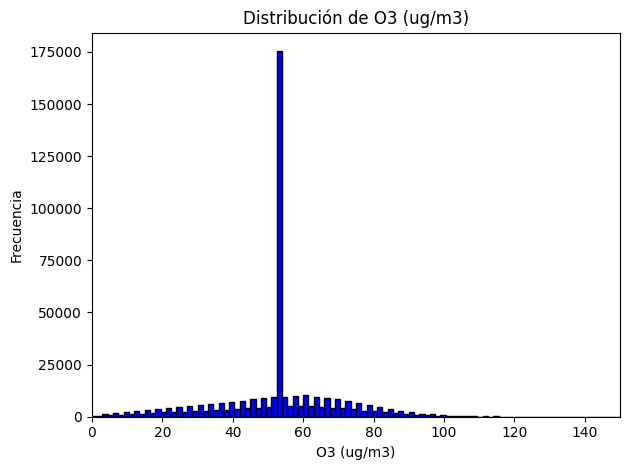

Estadísticas para O3:
Q1 - 1.5IQR = 31.50
Q1 = 48.00
Mediana = 52.62
Q3 = 59.00
Q3 + 1.5IQR = 75.50
Número de observaciones: 446014
Número de outliers: 91163


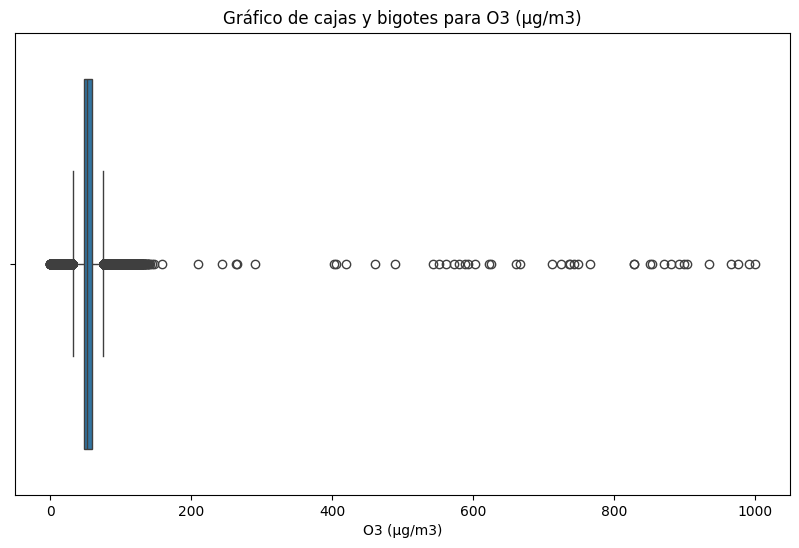

In [8]:
plt.hist(calidad_aire['O3 (ug/m3)'], bins=100, range=(0, 150), color='blue', edgecolor='black')
plt.title('Distribución de O3 (ug/m3)')  # Cambiado O3 a CO
plt.xlabel('O3 (ug/m3)')  # Cambiado O3 a CO
plt.ylabel('Frecuencia')
plt.xlim(0,150)
plt.tight_layout()
plt.show()


import seaborn as sns
# Estadísticas necesarias para reproducir el gráfico de cajas y bigotes
Q1 = calidad_aire['O3 (ug/m3)'].quantile(0.25)
Q3 = calidad_aire['O3 (ug/m3)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Estadísticas para O3:")
print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
print(f"Q1 = {Q1:.2f}")
print(f"Mediana = {calidad_aire['O3 (ug/m3)'].median():.2f}")
print(f"Q3 = {Q3:.2f}")
print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
print(f"Número de observaciones: {len(calidad_aire['O3 (ug/m3)'])}")
print(f"Número de outliers: {sum((calidad_aire['O3 (ug/m3)'] < lower_bound) | (calidad_aire['O3 (ug/m3)'] > upper_bound))}")

# Construcción del gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x=calidad_aire['O3 (ug/m3)'])
plt.title('Gráfico de cajas y bigotes para O3 (µg/m3)')
plt.xlabel('O3 (µg/m3)')
plt.show()


## DETECCIÓN DE ATÍPICOS SOBRE VARIABLES CATEGÓRICAS

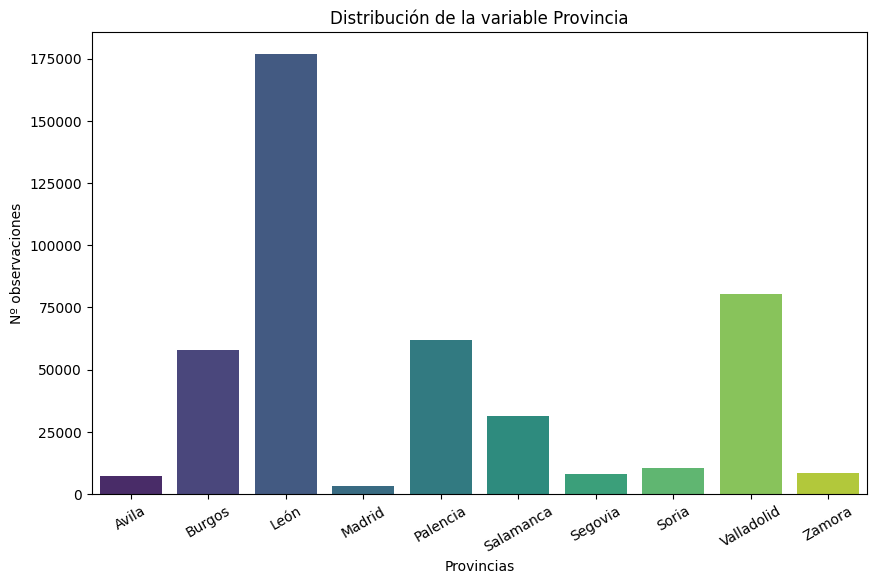

In [13]:
# Número de categorías que presenta la variable Provincia
categoria_counts = calidad_aire['Provincia'].value_counts()

# Construcción del gráfico de barras para la variable Provincia
plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette='viridis', hue=categoria_counts.index, legend=False)
plt.xlabel('Provincias')
plt.ylabel('Nº observaciones')
plt.xticks(rotation=30)
plt.title('Distribución de la variable Provincia')
plt.show()


## TRATAMIENTO DE VALORES ATÍPICOS EN VARIABLES NUMÉRICAS

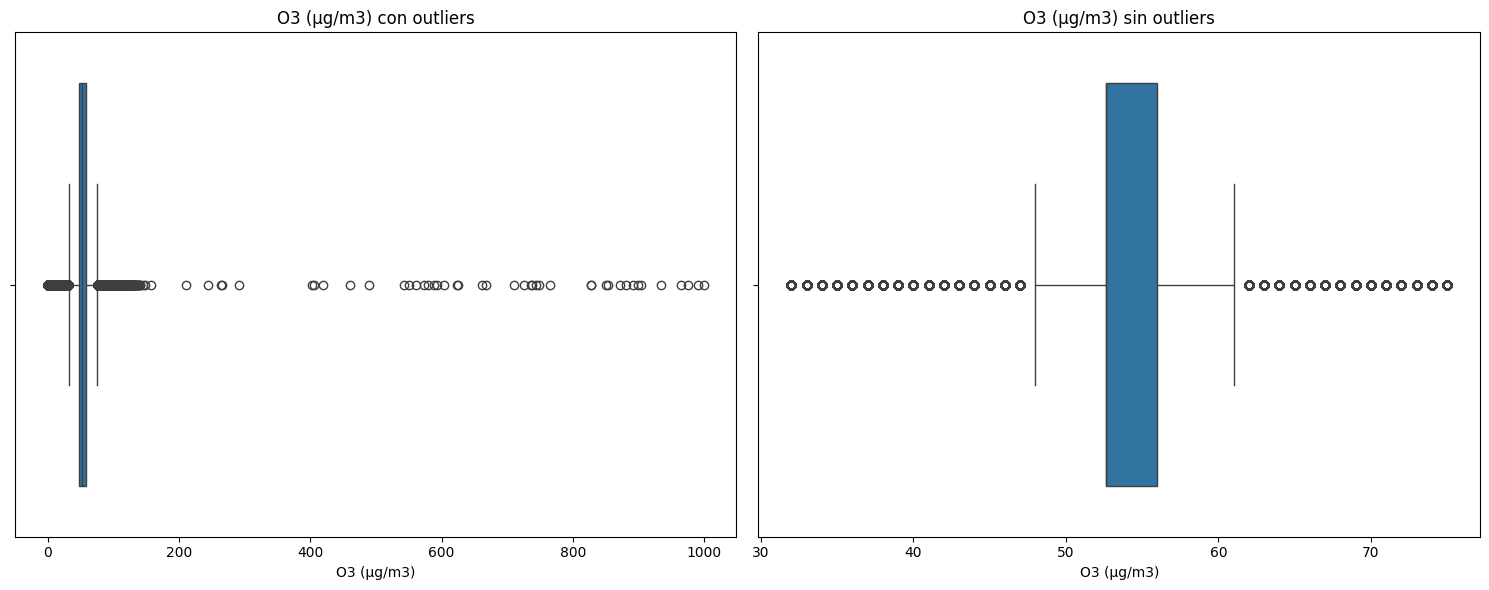

In [14]:
# Se genera una nueva tabla que no contiene los valores identificados como atípicos
calidad_aire_NoOut = calidad_aire[(calidad_aire['O3 (ug/m3)'] >= lower_bound) & 
(calidad_aire['O3 (ug/m3)'] <= upper_bound)]

# Construcción de los gráficos de cajas y bigotes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x=calidad_aire['O3 (ug/m3)'], ax=ax1)
ax1.set_title('O3 (µg/m3) con outliers')
ax1.set_xlabel('O3 (µg/m3)')

sns.boxplot(x=calidad_aire_NoOut['O3 (ug/m3)'], ax=ax2)
ax2.set_title('O3 (µg/m3) sin outliers')
ax2.set_xlabel('O3 (µg/m3)')

plt.tight_layout()
plt.show()


## TRATAMIENTO DE VALORES ATÍPICOS EN VARIABLES CATEGÓRICAS

In [18]:
# Eliminamos las filas que pertenecen al factor “Madrid”
calidad_aire_SM = calidad_aire[calidad_aire['Provincia'] != 'Madrid']

# Eliminamos el factor “Madrid”
calidad_aire_SM['Provincia'] = calidad_aire_SM['Provincia'].astype('category').cat.remove_unused_categories()

# Verificamos la eliminación de la categoría "Madrid"
print(calidad_aire_SM['Provincia'].cat.categories)

Index(['Avila', 'Burgos', 'León', 'Palencia', 'Salamanca', 'Segovia', 'Soria',
       'Valladolid', 'Zamora'],
      dtype='object')


## ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES

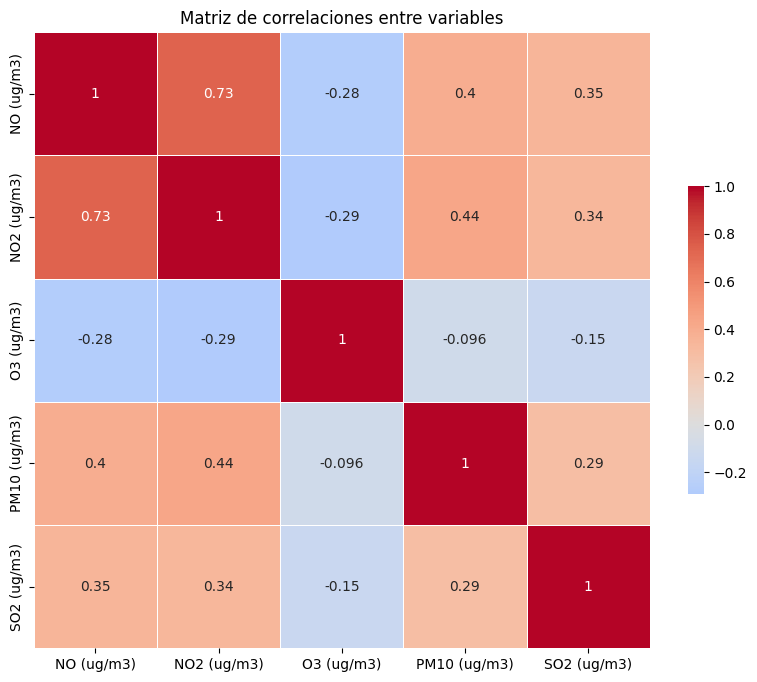

In [19]:
num_variables = calidad_aire.iloc[:, 1:6]

# Calculamos la matriz de coeficientes de correlación entre las variables numéricas
correlacion = num_variables.corr()

# Configuración del gráfico de correlación
plt.figure(figsize=(10, 8))

# Gráfico de correlaciones utilizando un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de correlaciones entre variables')
plt.show()


## EDA AUTOMÁTICO

In [20]:
!pip install setuptools #instalación de paquetes y dependencias
!pip install --upgrade ydata-profiling
!pip install ipywidgets
#Volvemos a leer el dataset sin los cambios realizados en secciones anteriores
calidad_aire = pd.read_csv('https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad_aire_historico/1284212629698.csv', sep = ';')
import pandas as pd
import webbrowser
from ydata_profiling import ProfileReport
report = ProfileReport(calidad_aire, title='EDA automático')
report_file = 'reporte_calidad_aire.html'
report.to_file(report_file)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True